<a href="https://colab.research.google.com/github/riddhipatel09/AI/blob/main/Decision_Tree_Classifier_for_Housing_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
  checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female d

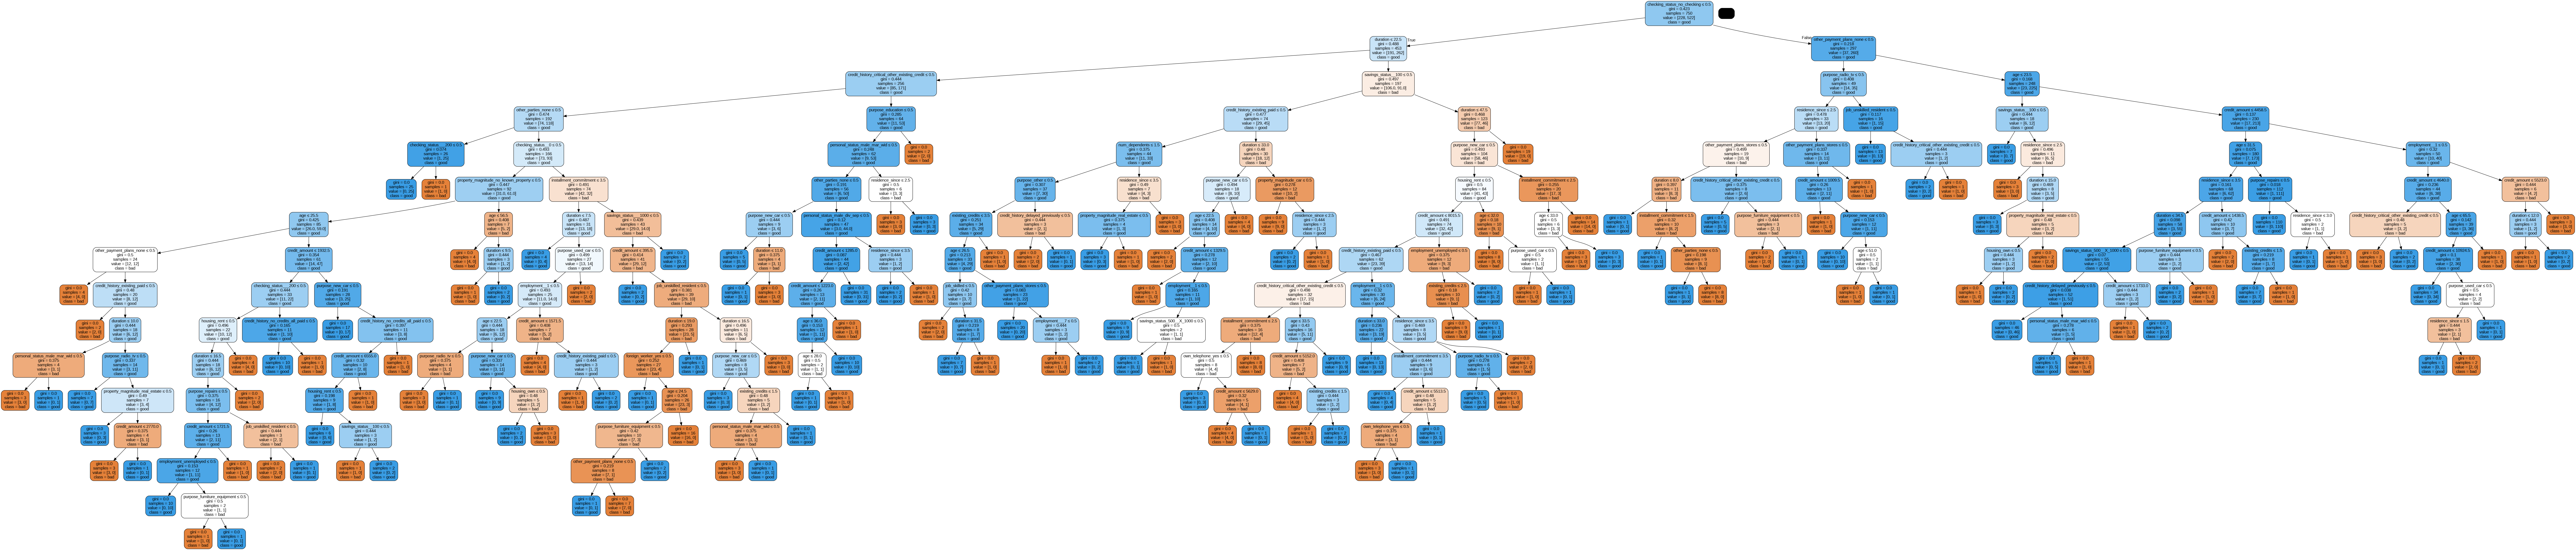

In [ ]:
# Install pydotplus if not already installed
!pip install pydotplus

# Step 1: Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from six import StringIO
from IPython.display import Image, display
import pydotplus

# Step 2: Load the finance dataset (German Credit Data)
credit = fetch_openml(name='credit-g', version=1, as_frame=True)
df = credit.frame
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Preprocess data
df_encoded = pd.get_dummies(df, drop_first=True)

# Fix column names to avoid illegal characters for graphviz
df_encoded.columns = df_encoded.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)

# Prepare features and target
X = df_encoded.drop('class_good', axis=1)
y = df_encoded['class_good']

# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("\nDecision Tree model trained successfully!")

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
print("\nAccuracy of model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Compare predictions with actual values
compare_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test.values})
print("\nSample Comparison:\n", compare_df.head())

# Step 8: Visualize the decision tree directly in Colab
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                feature_names=X.columns,
                class_names=['bad', 'good'],
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
if graph:
    display(Image(graph.create_png()))
else:
    print("Error in generating the graph.")


First 5 rows of the dataset:
  checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female d

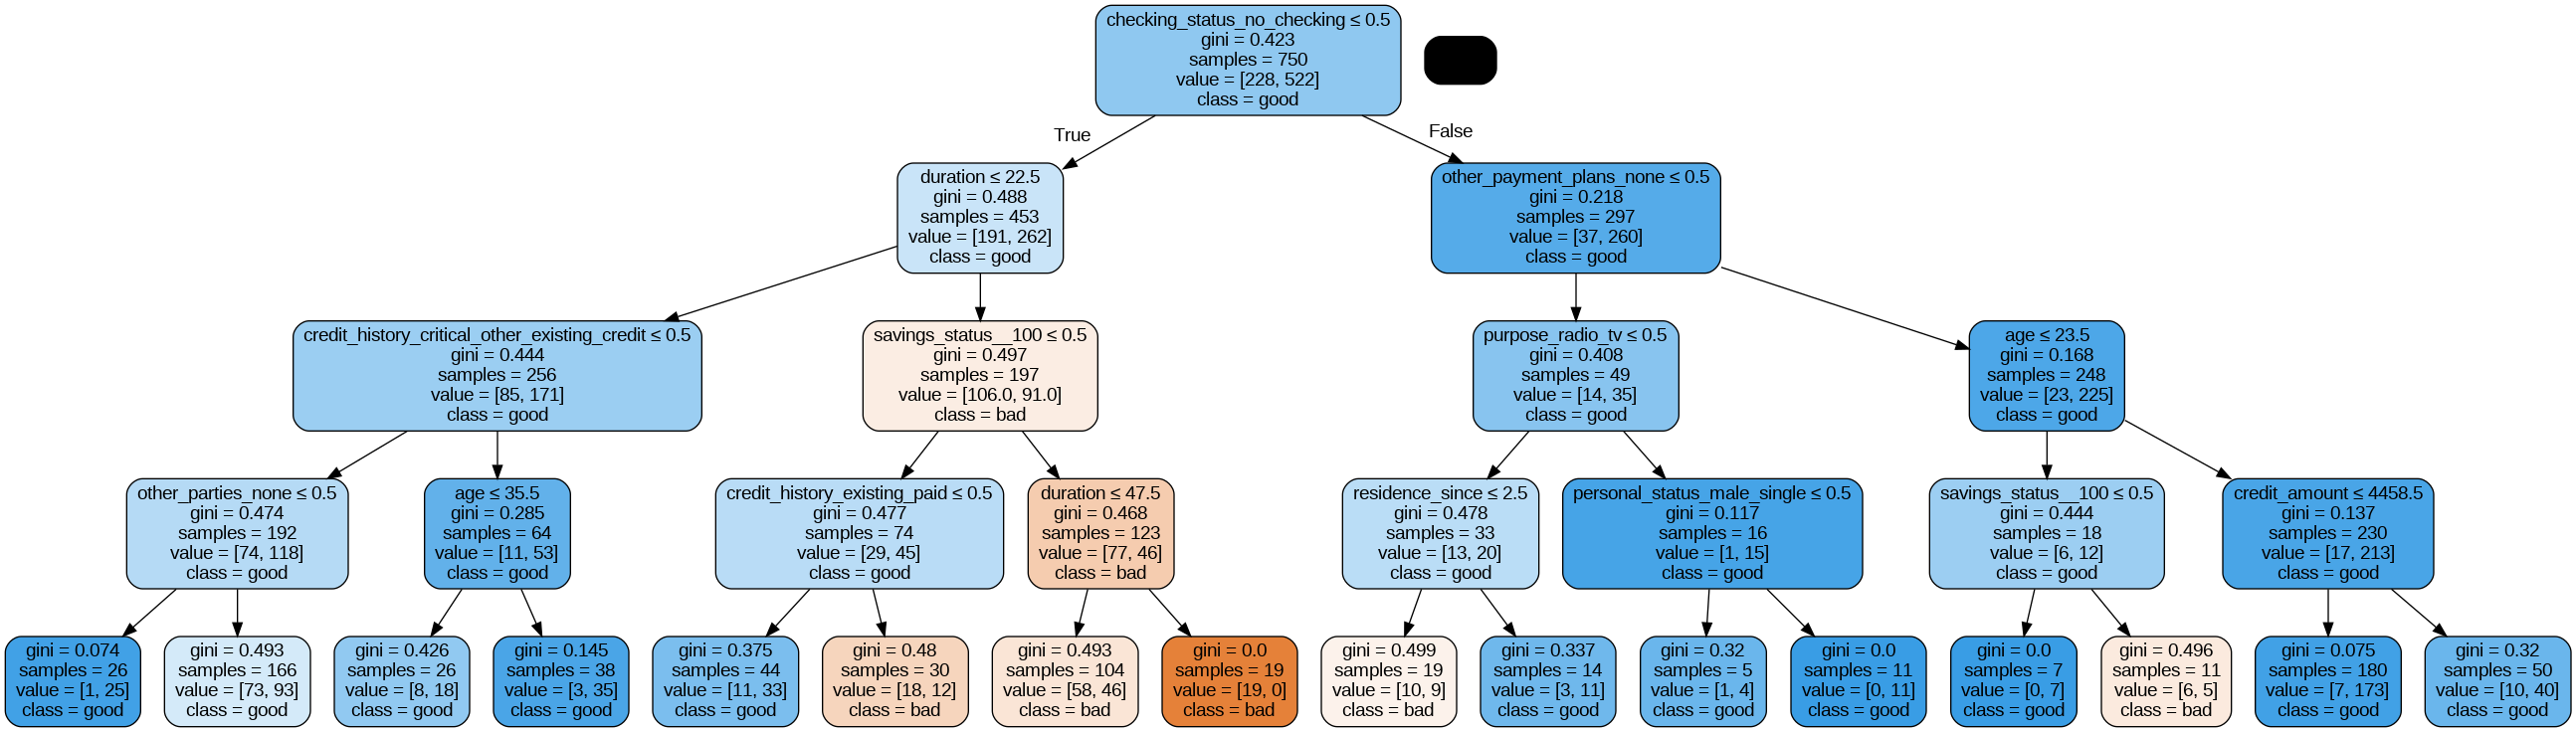

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from six import StringIO
from IPython.display import Image, display
import pydotplus

# Step 2: Load the finance dataset (German Credit Data)
credit = fetch_openml(name='credit-g', version=1, as_frame=True)
df = credit.frame
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Preprocess data
df_encoded = pd.get_dummies(df, drop_first=True)

# Clean column names to avoid graphviz issues
df_encoded.columns = df_encoded.columns.str.replace('[^A-Za-z0-9_]', '_', regex=True)

# Features and target
X = df_encoded.drop('class_good', axis=1)
y = df_encoded['class_good']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Train a simplified Decision Tree model
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)
print("\nSimplified Decision Tree model trained successfully!")

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("\nAccuracy of model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Compare predictions with actual values
compare_df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test.values})
print("\nSample Comparison:\n", compare_df.head())

# Step 8: Visualize the decision tree in Colab
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                feature_names=X.columns,
                class_names=['bad', 'good'],
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
if graph:
    display(Image(graph.create_png()))
else:
    print("Error in generating the decision tree graph.")
